# Guess the coin

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

In [1]:
import pandas as pd
import numpy as np

seq = pd.DataFrame([1,0,1,1,0,0])
p = len((seq[seq==1]).dropna())
n = len(seq)

def log_MLE(p,n, probability):
    log_prob = p*np.log(probability)+(n-p)*np.log(1-probability)
    return np.exp(log_prob)

print('Coin A is the most likely')
print('Coin A: ', log_MLE(p,n,0.5))
print('Coin B: ', log_MLE(p,n,0.75))

Coin A is the most likely
Coin A:  0.015625000000000007
Coin B:  0.006591796875000005


Joint Probality Mass Function:
$$L(p:x_1,...,x_n) = p^{\sum_{i\ =\ 1}^{n}x_{i}}\left(1\ -\ p\right)^{\left(n-\sum_{i=1}^{n}x_{i}\right)}$$
Take log of the equation.
$$log(L(p)) = {\sum_{i\ =\ 1}^{n}x_{i}}*log(p)+(n-{\sum_{i\ =\ 1}^{n}x_{i}})*log(1-p)$$
Partial derivative with respect to p:
$$\frac{\partial log(L(p))}{\partial p} = \frac{\sum_{i\ =\ 1}^{n}x_{i}}{p} - \frac{n - \sum_{i\ =\ 1}^{n}x_{i}}{1 - p} = \frac{(1 - p)\sum_{i\ =\ 1}^{n}x_{i} - pn + p\sum_{i\ =\ 1}^{n}x_{i}}{p(1-p)} = \frac{\sum_{i\ =\ 1}^{n}x_{i} - pn}{p(1 - p)}$$
Set to zero and solve for p.
$$p = \frac{\sum_{i\ =\ 1}^{n}x_{i}}{n}$$
The probability of the most likely coin has a 50% probability of heads (3 heads and 3 tails).

# Multiple Linear Regression

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

Consider the `Weight` column to be your target variable.

In [3]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

a. Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

In [4]:
print(X.shape)
X.head()

(158, 5)


,Length1,Length2,Length3,Height,Width
Species,,,,,
Bream,23.2,25.4,30.0,11.5200,4.0200
Bream,24.0,26.3,31.2,12.4800,4.3056
Bream,23.9,26.5,31.1,12.3778,4.6961
Bream,26.3,29.0,33.5,12.7300,4.4555
Bream,26.5,29.0,34.0,12.4440,5.1340


b. Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)
mae = np.mean(np.abs(y-y_pred))

print('Coefficients', regr.coef_)
print('Mean Absolute Error =', mae)

Coefficients [ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]
Mean Absolute Error = 91.71233364960418


c. Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Test size 0.25, random state 50
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=50)

regr2 = linear_model.LinearRegression()
regr2.fit(X_train,y_train)
y_test_pred = regr2.predict(X_test)
y_train_pred = regr2.predict(X_train)

test_mae = np.mean(np.abs(y_test-y_test_pred))
train_mae = np.mean(np.abs(y_train-y_train_pred))
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

print('Train MAE =',train_mae)
print('Train R2 =',train_r2)
print()
print('Test MAE =',test_mae)
print('Test R2 =',test_r2)

Train MAE = 86.0838430950453
Train R2 = 0.8749867938140782

Test MAE = 97.81799831813105
Test R2 = 0.8990516531635936


d. Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

          Length2
Length1  0.999415
Length2  1.000000
Length3  0.993202
Width    0.851321

The pairplot validates the low correlation (<0.8) of height,
as well as the strong correlations of Length 1 and Length 3.


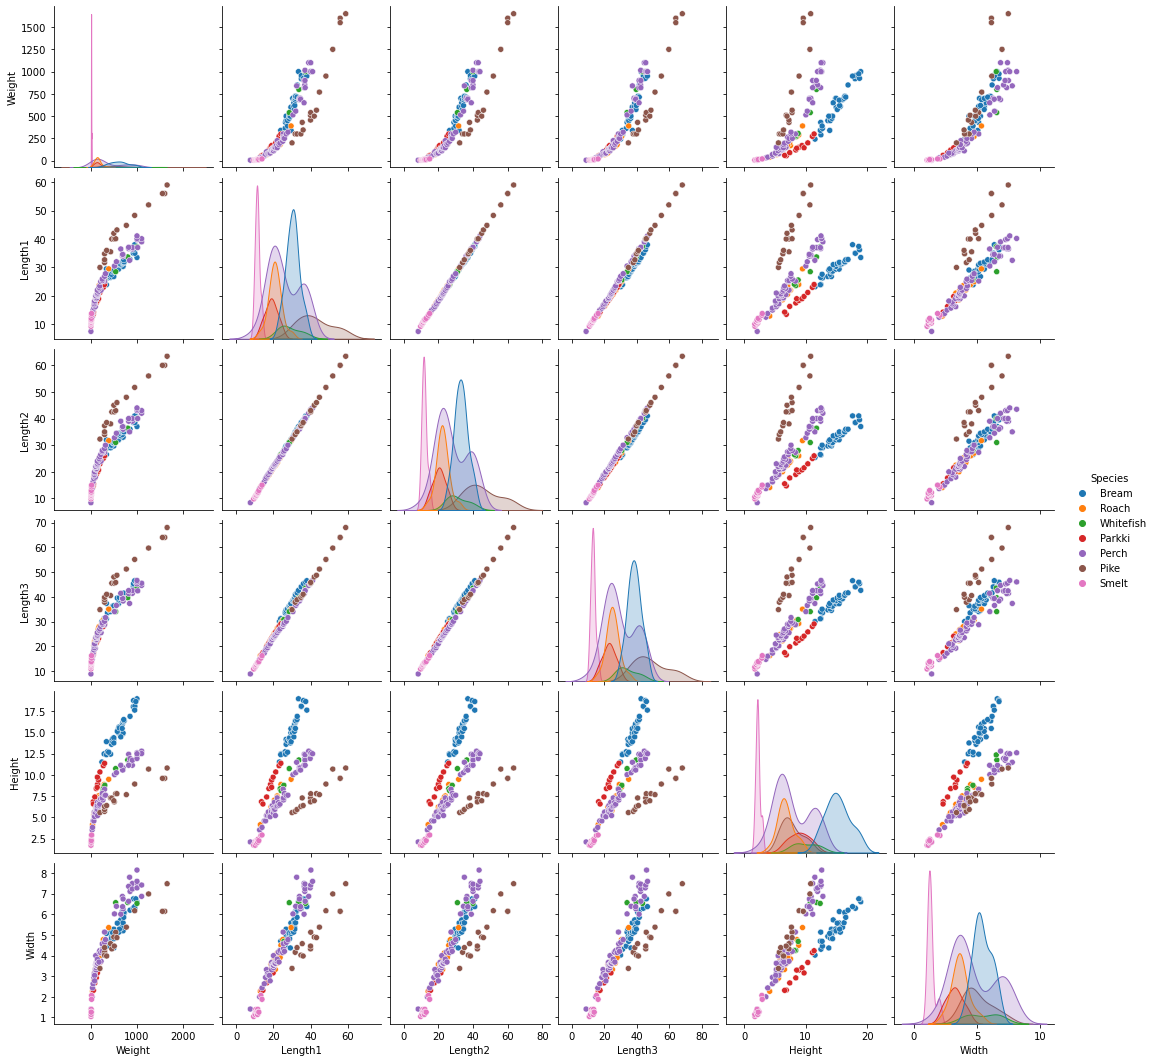

In [7]:
import seaborn as sns

#Coef Matrix
corr_matrix = X_train.corr()
print(corr_matrix[corr_matrix['Length2'] > 0.8][['Length2']])

sns.pairplot(df.reset_index(),hue='Species')
print()
print('The pairplot validates the low correlation (<0.8) of height,')
print('as well as the strong correlations of Length 1 and Length 3.')

e. Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

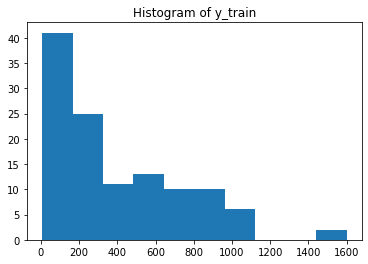

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_train)
plt.title('Histogram of y_train')
plt.show()

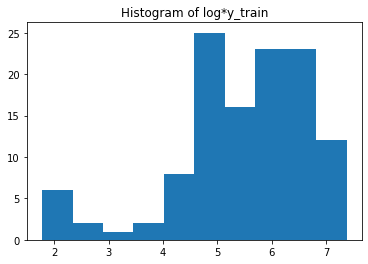

In [9]:
plt.hist(np.log(y_train))
plt.title('Histogram of log*y_train')
plt.show()

In [10]:
e = regr2.fit(X_train, np.log10(y_train))
test_pred = regr2.predict(X_test)
scale_pred = np.exp(test_pred)
print('Coefficients', e.coef_)
print('Mean Absolute Error =', mean_absolute_error(y_test,scale_pred))

Coefficients [-0.12133861  0.11630756  0.0192818   0.01535788  0.14503786]
Mean Absolute Error = 406.8928303744094


f. Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

In [11]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X, y)
print('Columns =', X.columns.values)
print('Ranking =', selector.ranking_)

Columns = ['Length1' 'Length2' 'Length3' 'Height' 'Width']
Ranking = [1 4 5 2 3]


g. Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df1=df.reset_index()
labelencoder = LabelEncoder()

df1['Species_Cat'] = labelencoder.fit_transform(df1['Species'])

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df1[['Species_Cat']]).toarray())
df1 = df1.join(enc_df)

X = df1.drop(['Weight','Species','Species_Cat'], axis=1)
y = df1['Weight']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=50)

regr3 = linear_model.LinearRegression()
regr3.fit(X_train,y_train)
y_test_pred = regr3.predict(X_test)
y_train_pred = regr3.predict(X_train)

test_MAE=np.mean(np.abs(y_test-y_test_pred))
train_MAE=np.mean(np.abs(y_train-y_train_pred))
test_R2=r2_score(y_test, y_test_pred)
train_R2=r2_score(y_train, y_train_pred)

print('Train MAE =',train_MAE)
print('Train R2 =',train_R2)
print('')
print('Test MAE =',test_MAE)
print('Test R2 =',test_R2)
print('')
print('One-hot encoding allows a reduction of both Test and Train error (vs integer encoding).')

Train MAE = 63.15937130081535
Train R2 = 0.9292624473278825

Test MAE = 72.60591304329998
Test R2 = 0.944471089248066

One-hot encoding allows a reduction of both Test and Train error (vs integer encoding).


# Lasso & Ridge

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric.

In [13]:
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None

#Reload Data
df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']
X = pd.DataFrame(preprocessing.scale(X, axis=1), columns=X.columns) #Scale X-axis

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle = True, random_state=50)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold

lasso = Lasso(random_state = 50, max_iter = 100000)
alphas = 10**np.linspace(10,-2,100)*0.5
params = [{'alpha': alphas}]

n_folds = 5
k_fold = KFold(n_folds, shuffle = True, random_state = 50)

lasso_regressor = GridSearchCV(lasso, params, cv = k_fold, scoring = 'neg_mean_absolute_error')
lasso_regressor.fit(X_train, y_train)
best_param_lasso = lasso_regressor.best_params_['alpha']

ridge = Ridge(random_state = 50, max_iter = 100000)
rparams = [{'alpha': alphas}]

ridge_regressor = GridSearchCV(ridge, rparams, cv = k_fold, scoring = 'neg_mean_absolute_error')
ridge_regressor.fit(X_train, y_train)
best_param_ridge = ridge_regressor.best_params_['alpha']

print('Lasso: ',best_param_lasso)
print('Ridge: ',best_param_ridge)
print('Best chosen parameter =', lasso_regressor.best_params_)

Lasso:  0.0466301673441609
Ridge:  0.005
Best chosen parameter = {'alpha': 0.0466301673441609}


2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed?

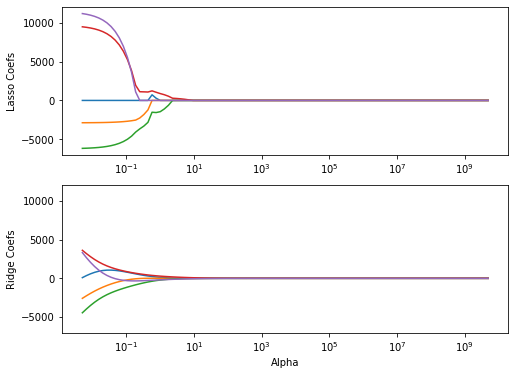

When the regularization parameter is increased, the coefficients are either shrunk or eliminated.
Lasso is capable of variable selection, while Ridge reduces variables to (effectively) zero.


In [15]:
from sklearn import linear_model
import matplotlib.pyplot as plt

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=50)

l_coef=[]
r_coef=[]
for a in alphas:
    lasso = linear_model.Lasso(alpha = a, max_iter = 100000)
    lasso.fit(X_train, y_train)
    l_coef.append(lasso.coef_)
    
    ridge=linear_model.Ridge(alpha = a, max_iter = 100000)
    ridge.fit(X_train, y_train)
    r_coef.append(ridge.coef_)
    
fig, (ax1, ax2) = plt.subplots(nrows=2,
                           ncols=1,
                           sharey=True,
                           figsize=(8, 6))

ax1.plot(alphas, l_coef)
ax1.set_xscale('log')
ax1.set_ylabel('Lasso Coefs')
ax2.plot(alphas, r_coef)
ax2.set_xscale('log')
ax2.set_ylabel('Ridge Coefs')
ax2.set_xlabel('Alpha')

plt.show()

print('When the regularization parameter is increased, the coefficients are either shrunk or eliminated.')
print('Lasso is capable of variable selection, while Ridge reduces variables to (effectively) zero.')

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each.

In [16]:
regr1 = linear_model.LinearRegression()
regr1.fit(X_train,y_train)
y_pred_b = regr1.predict(X_test)
mae = np.mean(np.abs(y_test-y_pred_b))

#best_param_lasso = lasso_regressor.best_params_['alpha']
lasso = linear_model.Lasso(alpha = best_param_lasso, random_state = 50, max_iter = 100000)
lasso.fit(X_train, y_train)
lasso_y_pred = lasso.predict(X_test)
lasso_mae = np.mean(np.abs(y_test-lasso_y_pred))

#best_param_ridge = ridge_regressor.best_params_['alpha']
ridge = linear_model.Ridge(alpha = best_param_ridge, random_state = 50, max_iter = 100000)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)
ridge_mae = np.mean(np.abs(y_test-ridge_y_pred))

print('Regression Results')
print('Least MAE =', mae)
print('Lasso MAE =', lasso_mae)
print('Ridge MAE =', ridge_mae)

Regression Results
Least MAE = 308.39040725915373
Lasso MAE = 306.1109759833368
Ridge MAE = 306.91529689354525


4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables.

In [17]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)
print('Alpha with smallest error =', lassocv.alpha_)
print()

best_param_lassocv = lassocv.alpha_

lasso = linear_model.Lasso(alpha = best_param_lassocv, max_iter=100000)
lasso.fit(X_train, y_train)

for i,x in enumerate(list(X_train)):
    print(x, lasso.coef_[i])

Alpha with smallest error = 0.008669540538066943

Length1 -0.0
Length2 -2869.0126250726403
Length3 -6133.723520061362
Height 9335.455830584353
Width 10988.854894534532


5) Why did we have to scale the data before regularization?

Scaling forces each coefficient to be penalized equitably - without this, some coefficients will be more quickly reduced to zero. 